# Problem Statement:

The objective is to build a classification model that can predict whether an individual's income is above or below $ 50,000 based on various demographic and socioeconomic attributes. The dataset contains information such as age, workclass, education level, occupation, marital status, capital gains/losses, hours worked per week, and native country. The target variable, "income," is a categorical variable with two categories: ">50k dollars" and "<50k dollars."

# Data Definition:

The dataset consists of the following attributes:

**age:** The age of the individual (numeric).

**workclass:** The type of work the individual is engaged in (categorical: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).

**fnlwgt:** Final weight representing the population. This attribute is used to adjust the sample to match the total population (numeric).

**education:** The highest level of education attained by the individual (categorical: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).

**educational-num:** The numerical representation of education level (numeric).

**marital-status:** Marital status of the individual (categorical: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).

**occupation:** The type of occupation of the individual (categorical).

**relationship:** The relationship status of the individual (categorical: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).

**race:** The race of the individual (categorical: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).

**gender:** The gender of the individual (categorical: Female, Male).

**capital-gain:** Capital gains received by the individual (numeric).

**capital-loss:** Capital losses incurred by the individual (numeric).

**hours-per-week:** The number of hours the individual works per week (numeric).

**native-country:** The country of origin of the individual (categorical).

**income:** The target variable indicating whether the individual's income is above or below $50,000 per year (categorical: >50k dollars, <50k dollars).

Using this dataset, the goal is to develop a machine learning model that can predict the income category based on the provided attributes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, classification_report

In [3]:
df = pd.read_csv("income_data.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


There are non standard missing values in the starting rows in the dataset in columns x2 and x7.
No junk rows observed in the end.

In [5]:
df.shape

(48842, 15)

A very healthy column-row ratio.

In [6]:
# This shows how many "?" are present.
df.replace(to_replace="?",value=np.NaN).isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
# replace ? with NaN that python recognizes as missing value.
df.replace(to_replace="?",value=np.NaN,inplace=True)

In [8]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Datatypes seem to be correct, except for the column 'educational-num'.

In [9]:
df['educational-num'] = df['educational-num'].astype('object')

In [10]:
# Created a new dataframe which contains all the numeric columns to count for the number of '0' values and also to use for further steps.
df_num = df.select_dtypes(include="number")
df_num.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,25,226802,0,0,40
1,38,89814,0,0,50
2,28,336951,0,0,40
3,44,160323,7688,0,40
4,18,103497,0,0,30


In [11]:
# Checking for the number of '0' values
df_num['capital-gain'].value_counts(sort=True)

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

In [12]:
# Checking for the number of '0' values
df_num['capital-loss'].value_counts(sort=True)

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

In [13]:
# Dropping column x11 from the main dataframe
df.drop('capital-loss',axis=1, inplace=True)
df.drop('capital-gain',axis=1, inplace=True)

In [14]:
# check descriptive statistics of numeric columns
df_num = df.select_dtypes(include="number")
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   hours-per-week  48842 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [15]:
df_num.describe()

,age,fnlwgt,hours-per-week
count,48842.000000,4.884200e+04,48842.000000
mean,38.643585,1.896641e+05,40.422382
std,13.710510,1.056040e+05,12.391444
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.175505e+05,40.000000
50%,37.000000,1.781445e+05,40.000000
75%,48.000000,2.376420e+05,45.000000
max,90.000000,1.490400e+06,99.000000


Column 'fnlwgt' has exponential values, due to its scale.

All columns seem to have outliers.

In [16]:
#function to plot graphs

def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

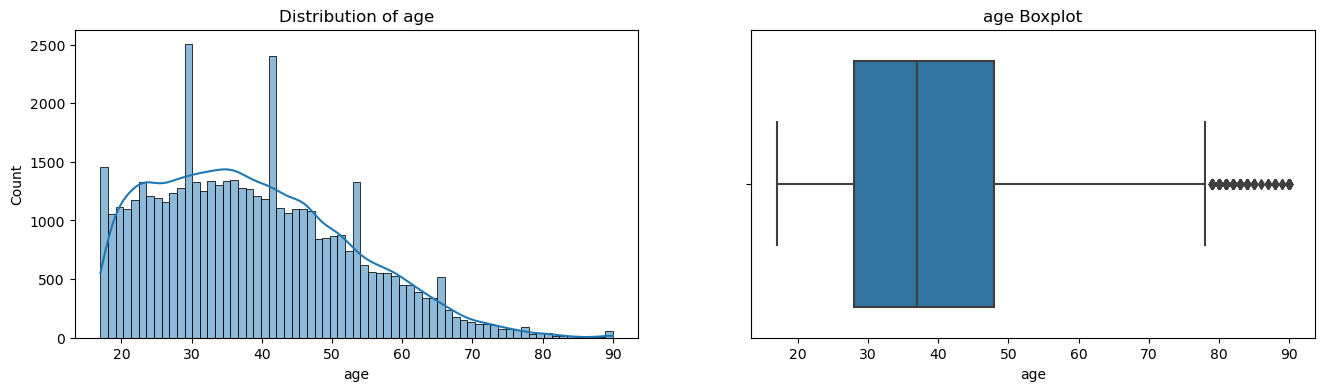

In [17]:
#distribution of wheelbase
plot_num(df,'age')

This looks like a normal distribution with outliers on the right,and it started from 17 years of age, which can be understood, since, this data is about income.

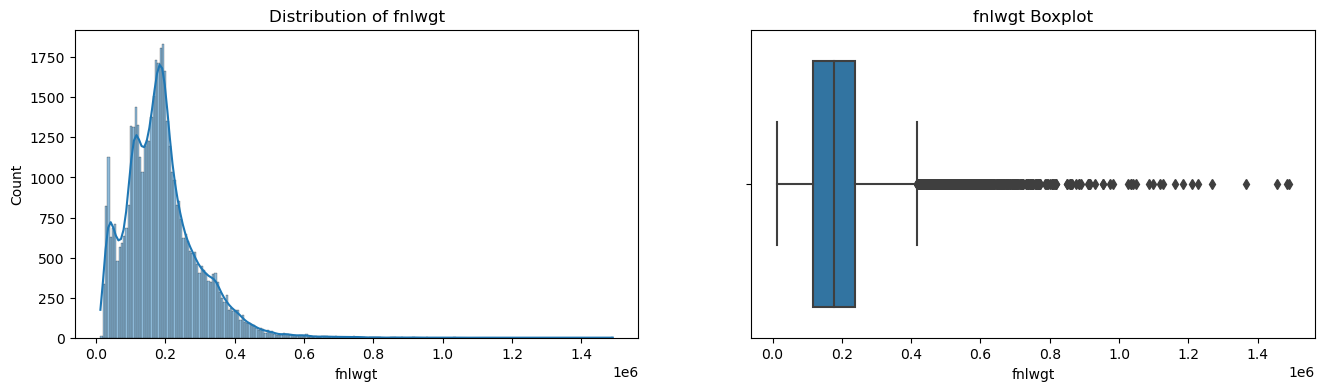

In [18]:
#distribution of wheelbase
plot_num(df,'fnlwgt')

Highly right skewed column, will analyse it further in bivariate analysis

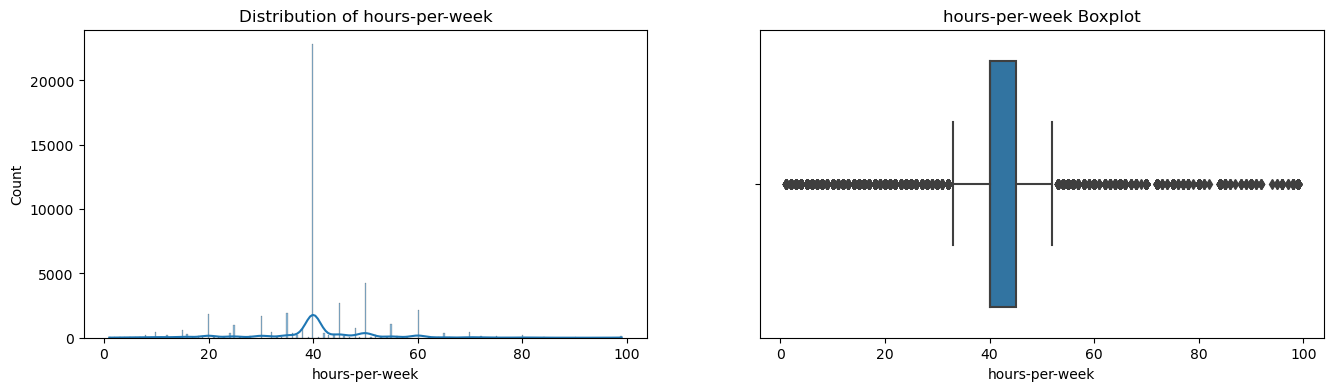

In [19]:
#distribution of wheelbase
plot_num(df,'hours-per-week')

The mean of the hours worked per week is around 40 hours and this column has very high variance, which means there are people who outwork everyone and also there are people who work very less hours per week, representing reality.

In [20]:
# check descriptive statistics of catagorical columns
df_cat = df.select_dtypes(include="object")
df_cat.describe()

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,16,7,14,6,5,2,41,2
top,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,15784,22379,6172,19716,41762,32650,43832,37155


Most of the employees are employed in the private sector.

Are white males and stay in United States and earn less than 50,000 USD.

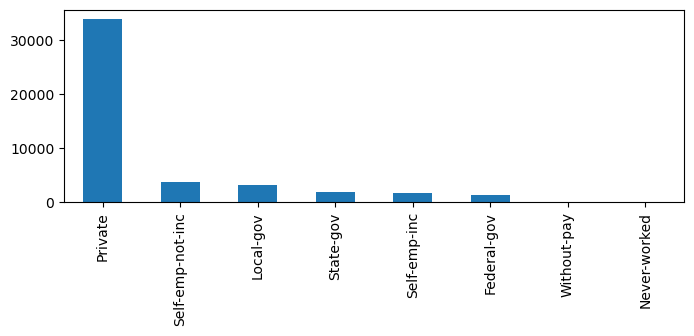

In [21]:
# how many rows present for each value in a category column
plt.figure(figsize=(8, 2.5))
df['workclass'].value_counts().plot(kind='bar');

Most of the employees are working in the private sector.


Earlier, we have seen that this column has null values, since we fill a categorical column with its mode, and the difference between the frequency of the highest occuring category and of the following category is huge, mode imputation seems to be the best alternative we have other than dropping the null values.

In [22]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

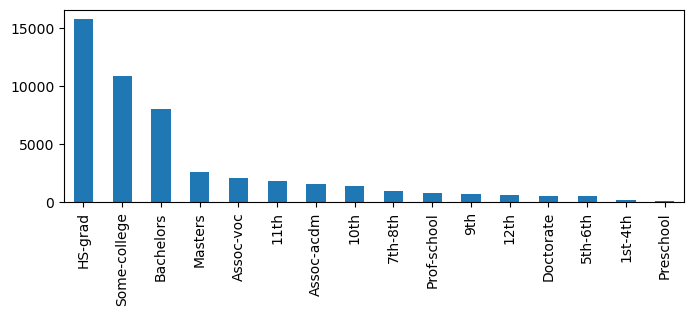

In [23]:
# how many rows present for each value in a category column
plt.figure(figsize=(8, 2.5))
df['education'].value_counts().plot(kind='bar');

Most of the employees have an educational qualification of High School Graduates.

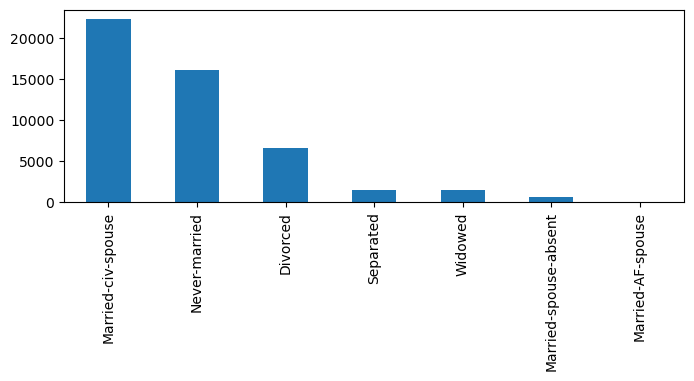

In [24]:
# how many rows present for each value in a category column
plt.figure(figsize=(8, 2.5))
df['marital-status'].value_counts().plot(kind='bar');

Most of the employees are married and have a civilian spouse.

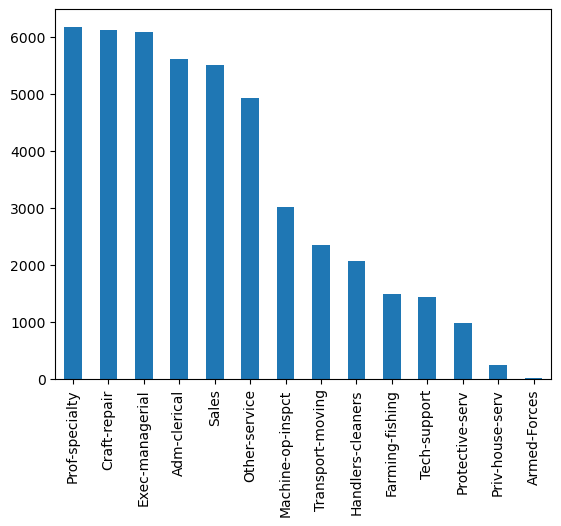

In [25]:
# how many rows present for each value in a category column
df['occupation'].value_counts().plot(kind='bar');

Most of the employees are working in a Professional specialty occupation, very closely followed by craft repair and executive managerial occupations.


Earlier, we have seen that this column has null values, since we fill a categorical column with its mode, and the difference between the frequency of the highest occuring category and of the following categories is very small, dropping null values would be the right choice.

In [26]:
df['occupation'].dropna(inplace=True)

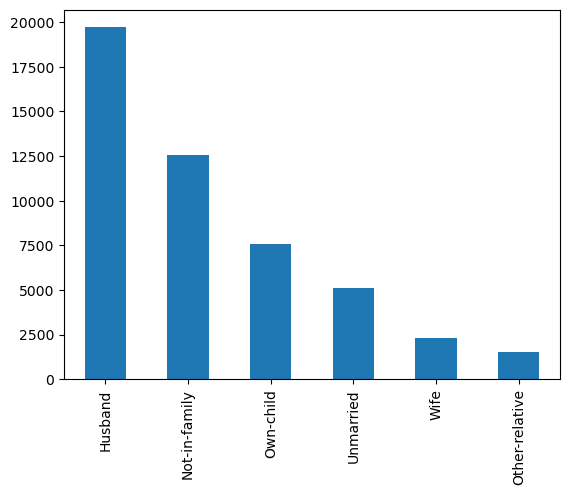

In [27]:
# how many rows present for each value in a category column
df['relationship'].value_counts().plot(kind='bar');

Most of the employees are husbands.

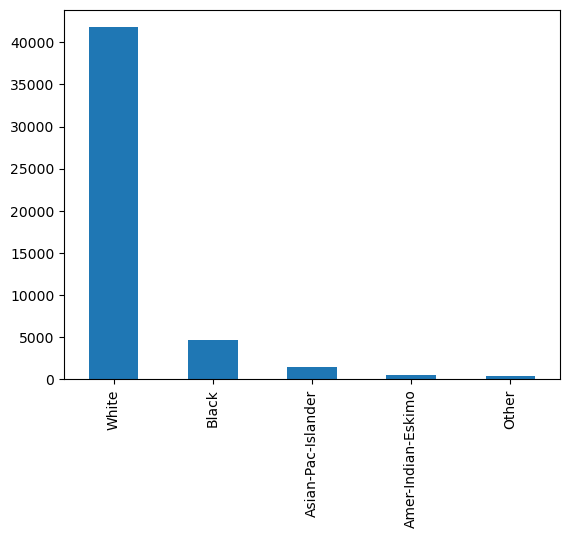

In [28]:
# how many rows present for each value in a category column
df['race'].value_counts().plot(kind='bar');

Most of the employees belong to the white race.

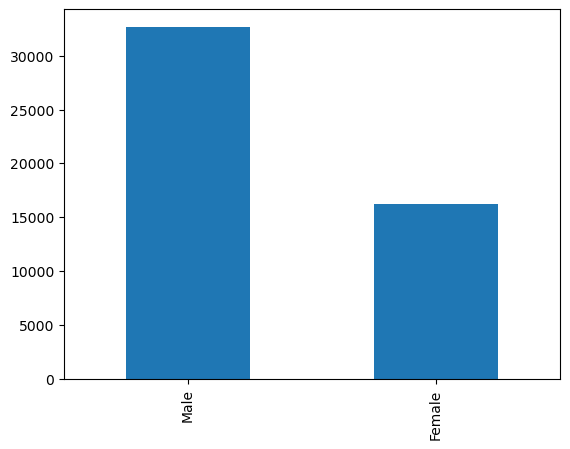

In [29]:
# how many rows present for each value in a category column
df['gender'].value_counts().plot(kind='bar');

Most of the employees are males.

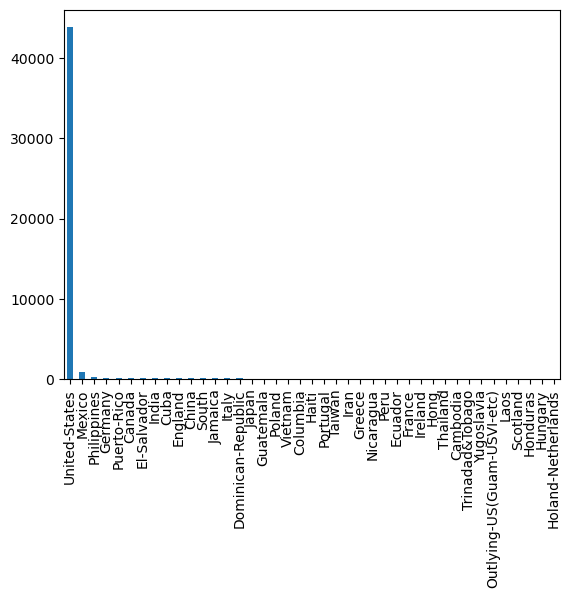

In [30]:
# how many rows present for each value in a category column
df['native-country'].value_counts().plot(kind='bar');

Most of the employees are from the United States.


Earlier, we have seen that this column has null values, since we fill a categorical column with its mode, and the difference between the frequency of the highest occuring category and of the following category is huge, mode imputation seems to be the best alternative we have other than dropping the null values.

In [31]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace=True)

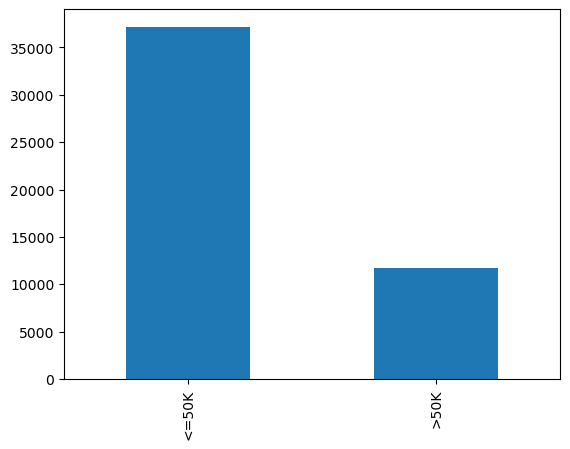

In [32]:
# how many rows present for each value in a category column
df['income'].value_counts().plot(kind='bar');

Most of the datapoints in the dataset are of people who are earning less than 50,000 USD annually.

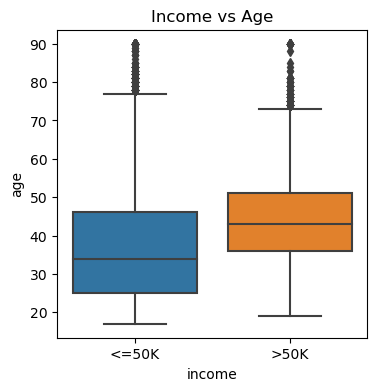

In [33]:
plt.figure(figsize=(4,4))
sns.boxplot(x='income',y='age',data=df)
plt.title('Income vs Age')
plt.show();

Most of the employees, who are earning less than 50,000 USD, belong to the ages between 30 and 35 years, whereas, the employees, who are earning greater than 50,000 USD, belong to the ages between 40 and 45 years.

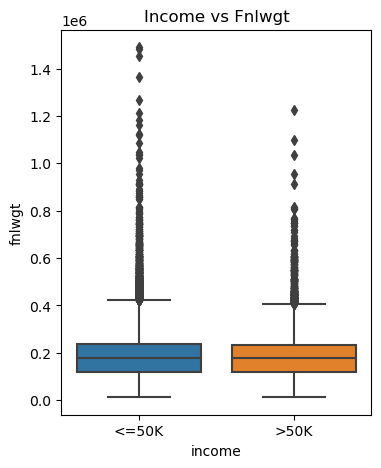

In [34]:
plt.figure(figsize=(4,5))
sns.boxplot(x='income',y='fnlwgt',data=df)
plt.title('Income vs Fnlwgt')
plt.show();

Meaningless column.

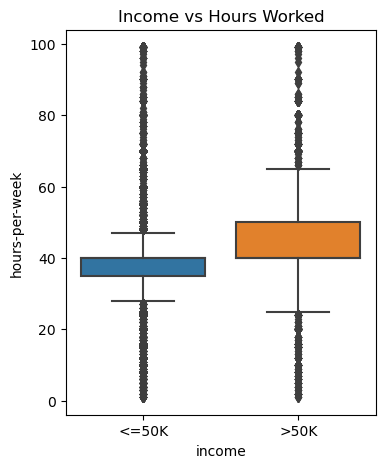

In [35]:
plt.figure(figsize=(4,5))
sns.boxplot(x='income',y='hours-per-week',data=df)
plt.title('Income vs Hours Worked')
plt.show();

Employees who work for more than 40 hours a week, earn more than 50,000 USD, whereas employees who work for less than 40 hours a week, earn less than 50,000 USD.

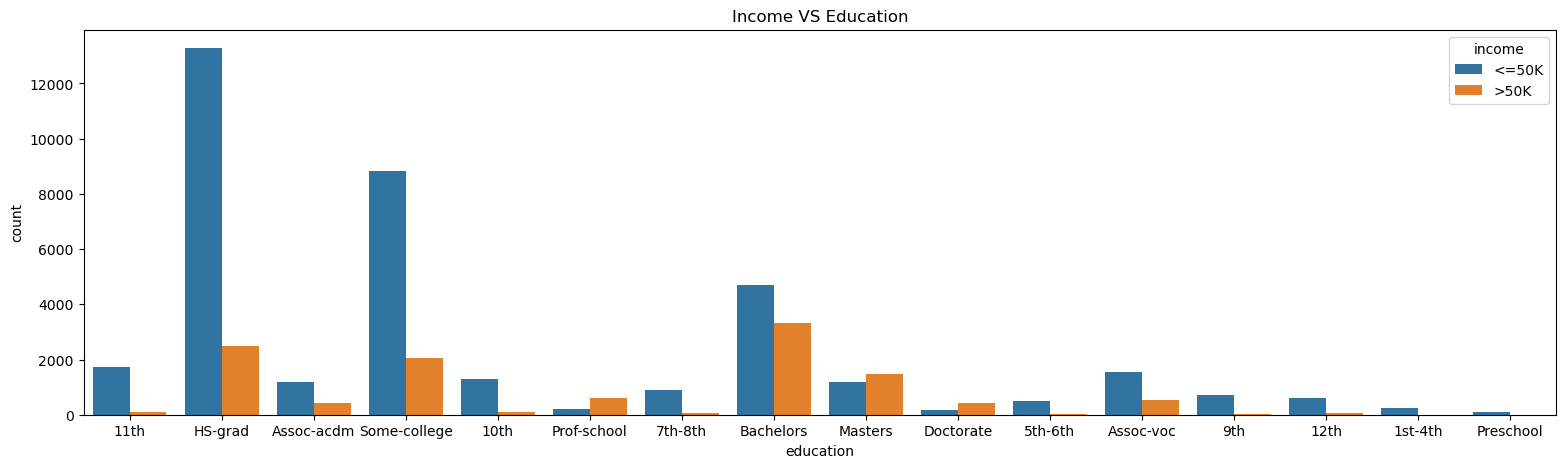

In [36]:
plt.figure(figsize=(19,5))
sns.countplot(x='education',hue='income',data=df)
plt.title('Income VS Education')
plt.show()

Employees earning less than 50,000 USD, are High School Graduates, whereas, employees earning greater than 50,000 USD, are Bachelors in education.

In all educational levels except masters, Prof-school and doctorate, employees who are earning more than 50,000 USD are less in comparison with lees than 50,000 USD earners.

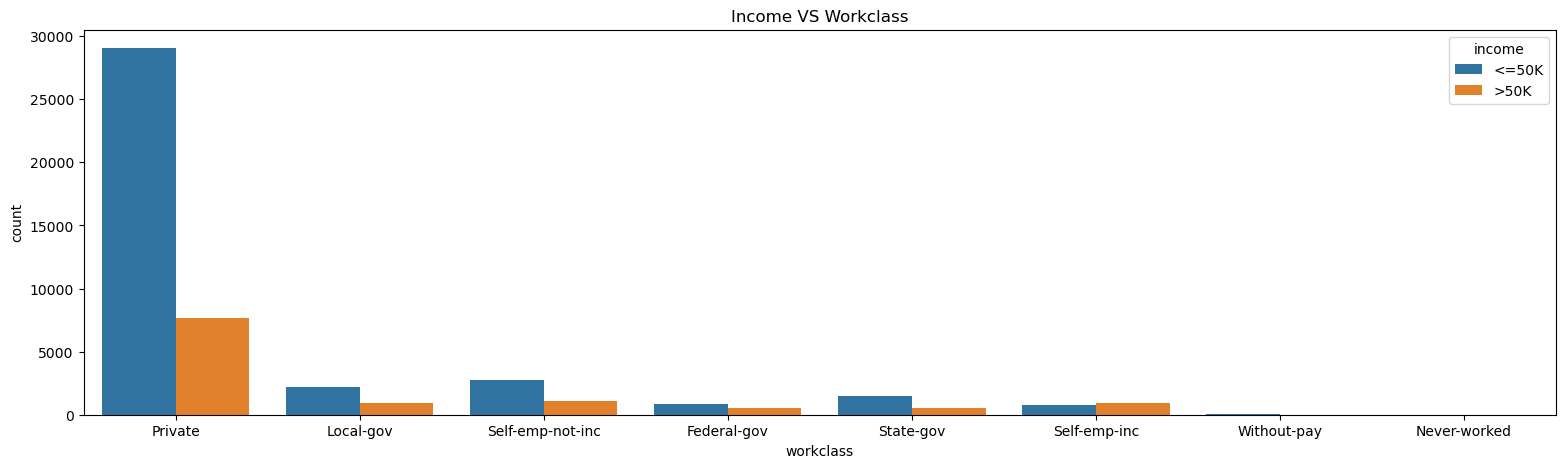

In [37]:
plt.figure(figsize=(19,5))
sns.countplot(x='workclass',hue='income',data=df)
plt.title('Income VS Workclass')
plt.show()

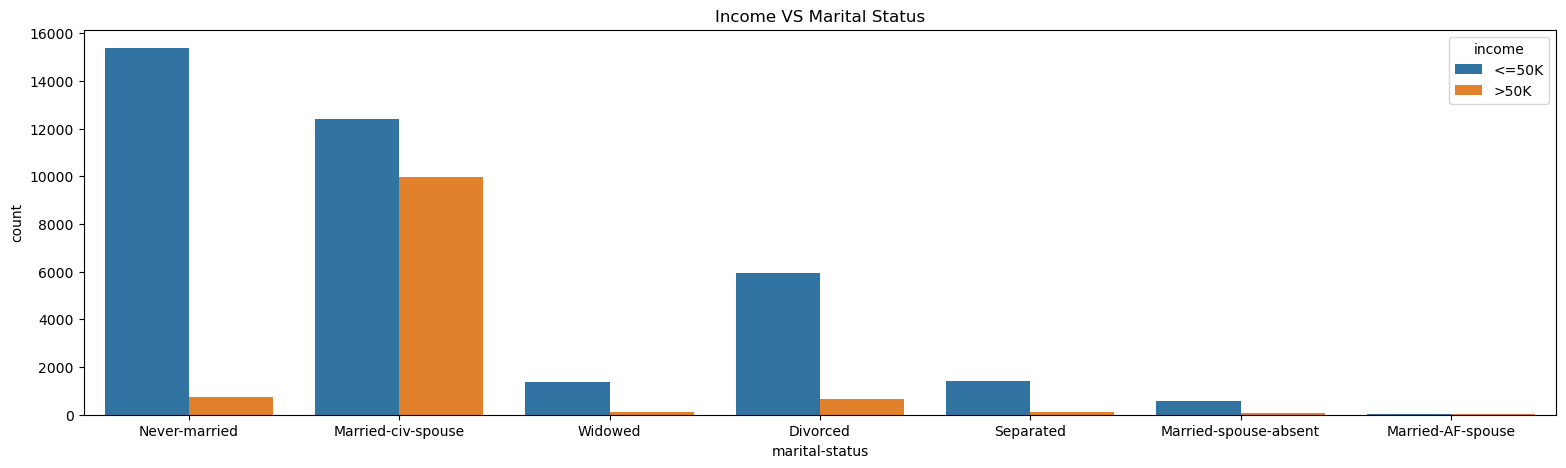

In [38]:
plt.figure(figsize=(19,5))
sns.countplot(x='marital-status',hue='income',data=df)
plt.title('Income VS Marital Status')
plt.show()

Most of the employees who are never married, are earning less than 50,000 USD, whereas, most of the employees who are earning more than 50,000 USD, are married to a civilian spouse.

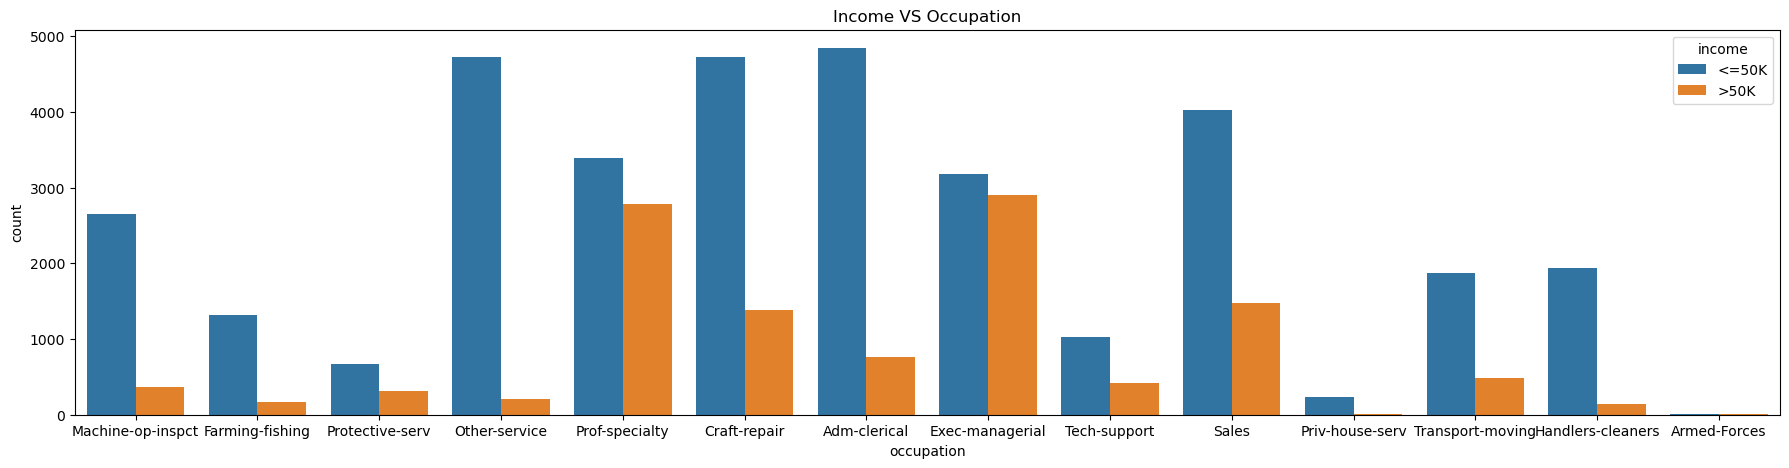

In [39]:
plt.figure(figsize=(22,5))
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Income VS Occupation')
plt.show()

In all occupations, employees who earn more than 50,000 USD are less.

There is huge gap in the count of two income classes in other services.

Least gap in count of two income classes is in Exec-managerial, whereas, highest gap is in Machine-op-inspct.

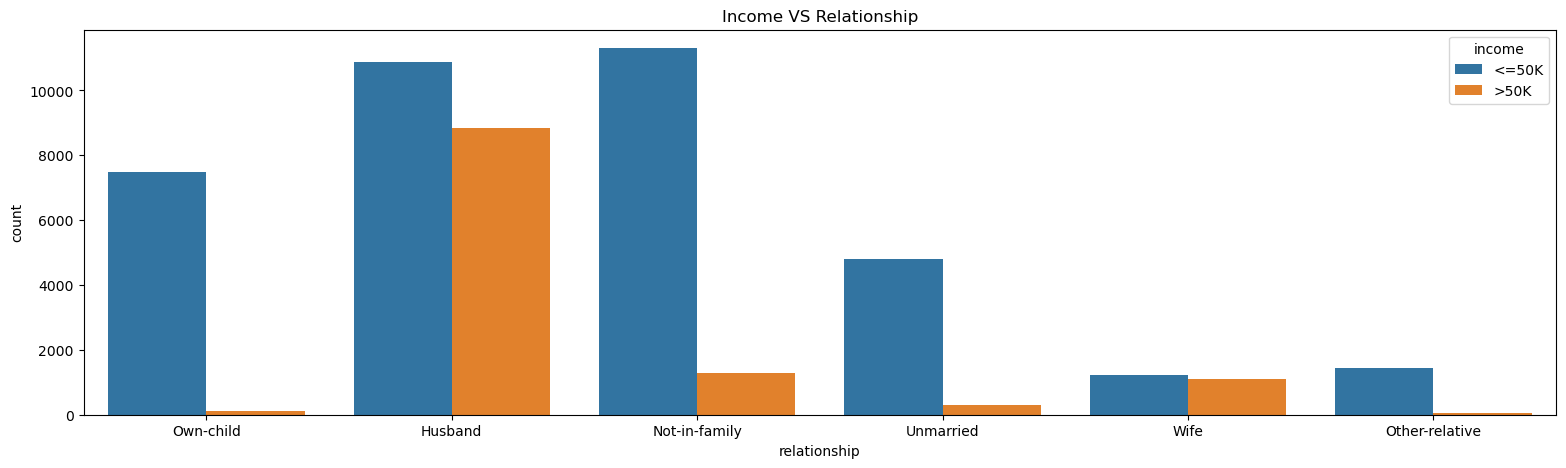

In [40]:
plt.figure(figsize=(19,5))
sns.countplot(x='relationship',hue='income',data=df)
plt.title('Income VS Relationship')
plt.show()

Most the employees who earn more than 50,000 USD are husbands, and most of the employees who earn less than 50,000 USD are not in family.

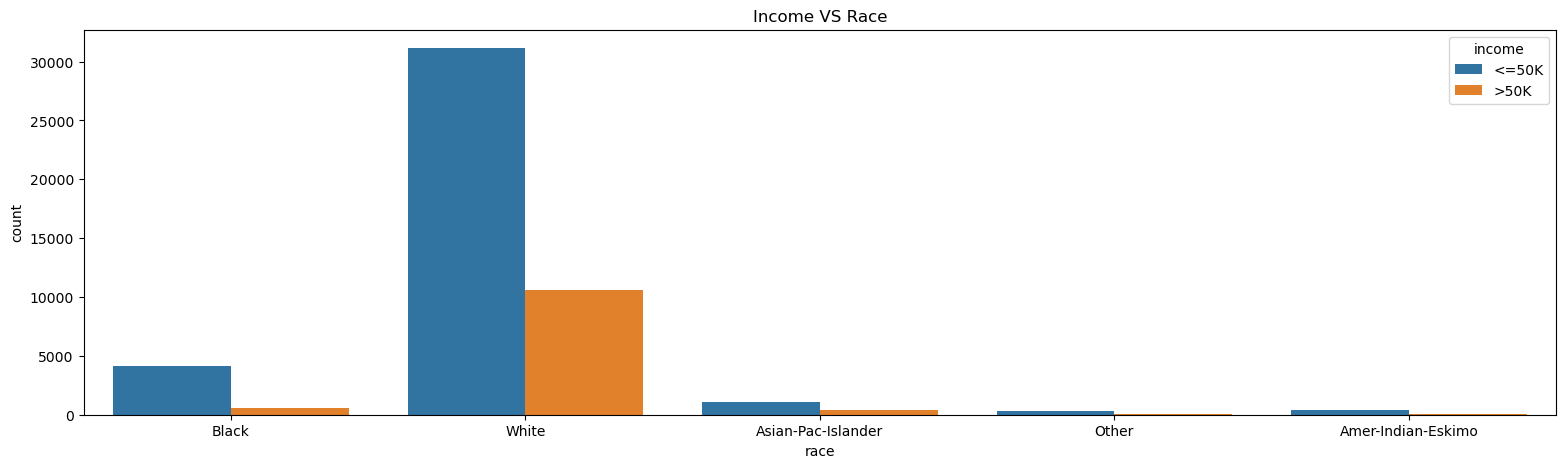

In [41]:
plt.figure(figsize=(19,5))
sns.countplot(x='race',hue='income',data=df)
plt.title('Income VS Race')
plt.show()

Since most of the employees are white, both the income classes are in the same category.

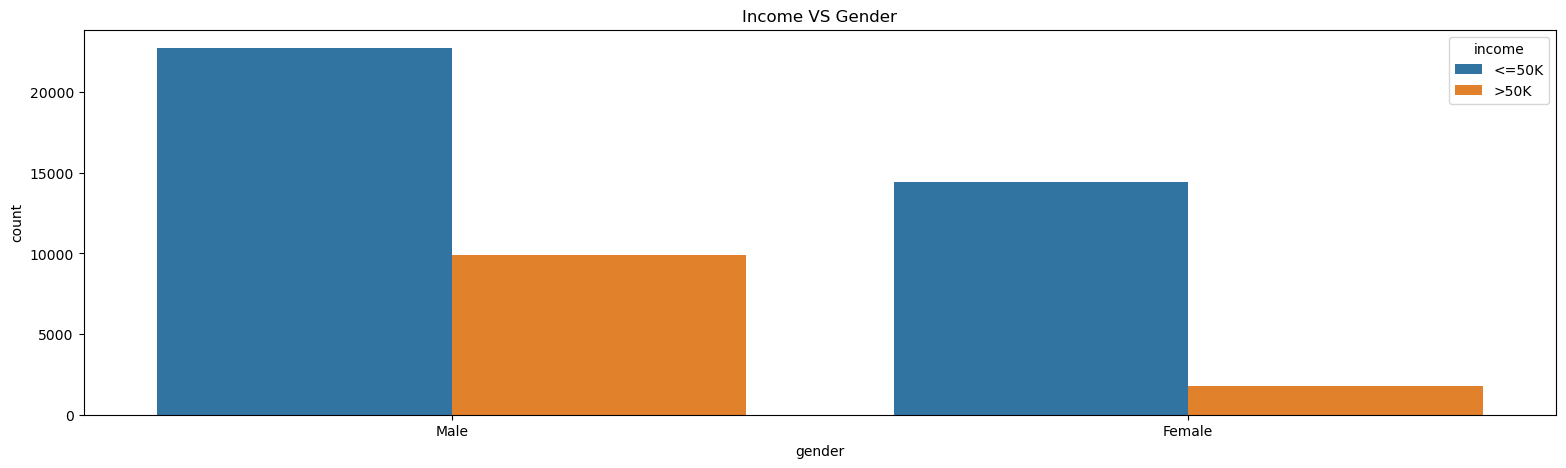

In [42]:
plt.figure(figsize=(19,5))
sns.countplot(x='gender',hue='income',data=df)
plt.title('Income VS Gender')
plt.show()

Since most of the employees are male, both the income classes are in the same category.

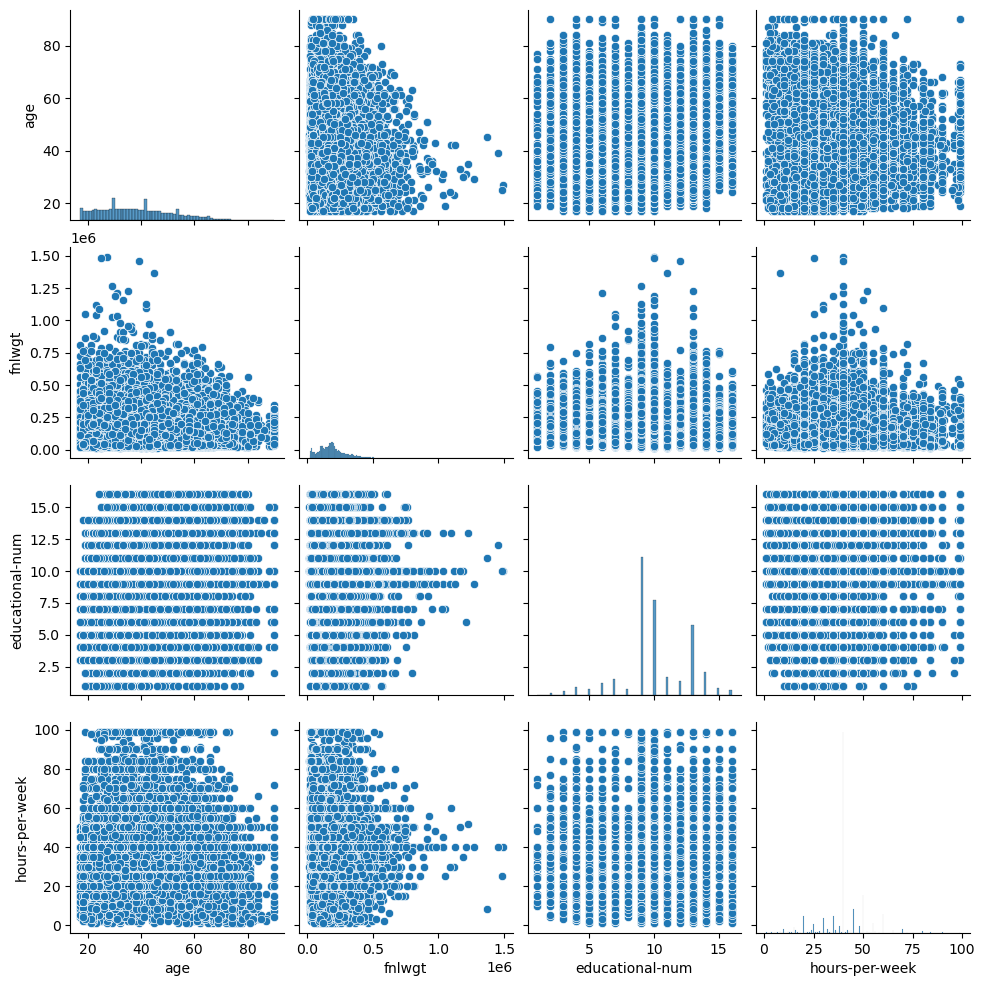

In [43]:
# pairplots to study relationships
sns.pairplot(df);

Cannot get any meaningful inference.

In [44]:
#counting and removing outliers
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1

df = df[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]
df.shape

(42009, 13)

Removed outliers, since outliers affect the model understanding.

In [45]:
df['educational-num'] = df['educational-num'].astype('int64')

Converting the datatype from object to int, for the purpose of model fitting.

In [46]:
df.drop(['fnlwgt','education','native-country','workclass','race'],axis=1,inplace=True)

Dropping irrelevant columns, since the model cannot obtain any useful information.

In [47]:
dfd = df.copy()

In [48]:
dfd.shape

(42009, 8)

In [49]:
dfd_num = dfd.select_dtypes(include='number')
dfd_cat = dfd.select_dtypes(include='object')

In [50]:
mmscaler = MinMaxScaler()
dfd_num_rescaled = pd.DataFrame(mmscaler.fit_transform(dfd_num), columns=dfd_num.columns)

Scaled the numerical columns.

In [51]:
ohe = OneHotEncoder(drop='first')
dfd_cat_ohe = pd.DataFrame(ohe.fit_transform(dfd_cat).toarray(), columns=ohe.get_feature_names_out())

One hot encoded the categorical columns.

In [52]:
# check shape of the two dataframes
dfd_num_rescaled.shape, dfd_cat_ohe.shape

((42009, 3), (42009, 27))

In [53]:
 dfd_xformd = pd.concat([dfd_num_rescaled, dfd_cat_ohe], axis = 1)

Concatenating the one hot encoded dataframe and the scaled dataframe.

In [54]:
# this has all the feature columns
dfd_xformd.head()

,age,educational-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,...,occupation_Tech-support,occupation_Transport-moving,occupation_nan,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male,income_>50K
0,0.109589,0.400000,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.533333,0.714286,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.150685,0.733333,0.428571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.369863,0.600000,0.428571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.013699,0.600000,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
# separate dataset into features and label
labl = dfd_xformd['income_>50K']
dfd_xformd.drop('income_>50K',axis=1,inplace=True)

In [56]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(dfd_xformd, labl, random_state = 14, test_size = 0.25)
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (31506, 29)
y_train (31506,)
X_test (10503, 29)
y_test (10503,)
